# Time series for traffic analysis using python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("../data/Train_data.csv")
df_test = pd.read_csv("../data/Test_data.csv")

df_train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
#making copy of dataset so that it doesnot affect then original datasets
train_original=df_train.copy()
test_original=df_test.copy()

In [4]:
train_original.columns , test_original.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train_original.dtypes , test_original.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train_original.shape , test_original.shape 

((18288, 3), (5112, 2))

In [7]:
#feature extrations 

df_train["Datetime"] = pd.to_datetime(df_train.Datetime, format= '%d-%m-%Y %H:%M' )
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
 
df_test["Datetime"] = pd.to_datetime(df_test.Datetime, format= '%d-%m-%Y %H:%M' )
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')



In [8]:
#extract the year, month, day and hour from the Datetime to validate our hypothesis.

for i in(df_train, df_test, test_original, train_original):
    i['Year'] = i.Datetime.dt.year
    i["Month"]= i.Datetime.dt.month
    i["Day"] = i.Datetime.dt.day
    i["Hour"] = i.Datetime.dt.hour
    
    
    
   
   

In [9]:
# we will first extract the day of the week
df_train["Day of week"] = df_train["Datetime"].dt.dayofweek
temp = ["Datetime"]

In [10]:
df_train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [11]:
#Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

def WeekEnd_or_WeekDay(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = df_train['Datetime'].apply(WeekEnd_or_WeekDay)
df_train['weekend']=temp2

In [12]:
df_train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


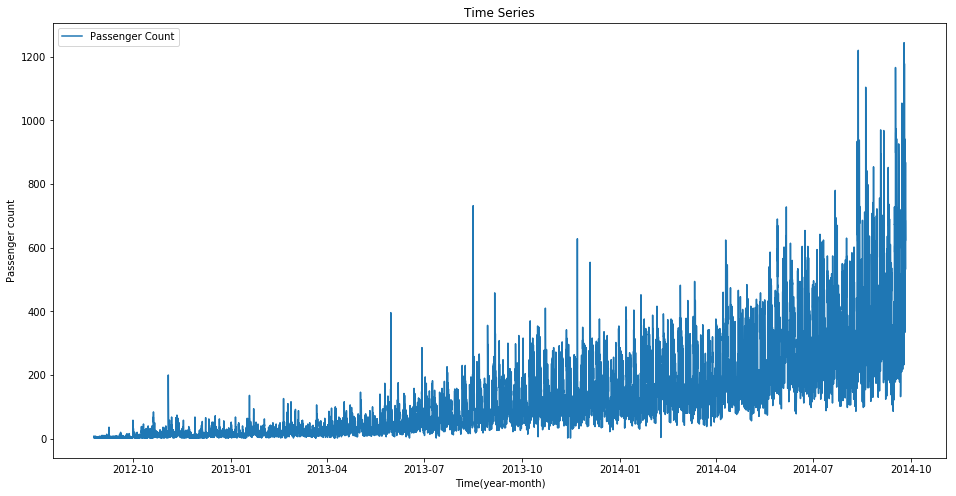

In [13]:
df_train.index = df_train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=df_train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

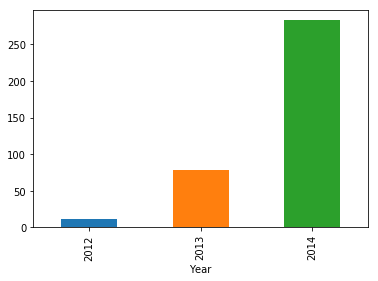

In [14]:
#explortatory analysis 
df_train.groupby('Year')['Count'].mean().plot.bar()

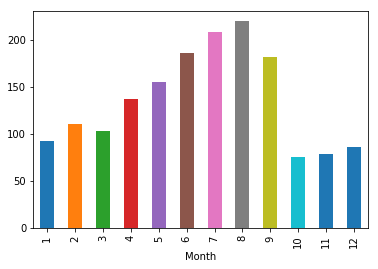

In [15]:
df_train.groupby('Month')['Count'].mean().plot.bar()

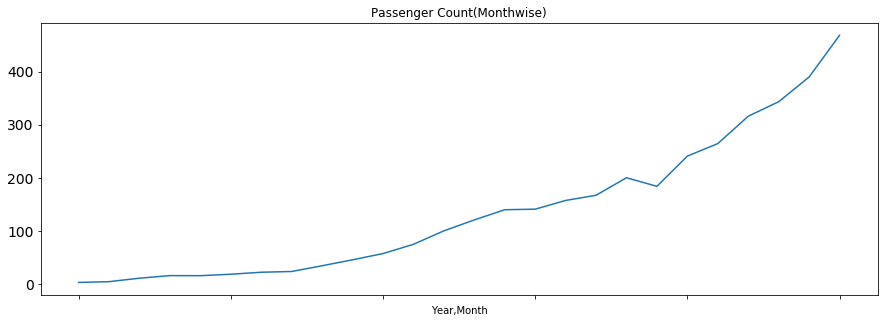

In [16]:
temp = df_train.groupby(['Year', 'Month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

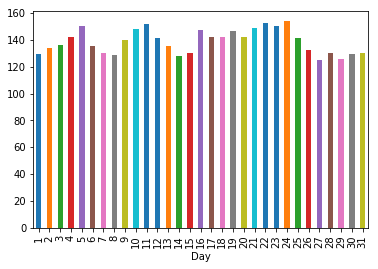

In [17]:
df_train.groupby('Day')['Count'].mean().plot.bar()

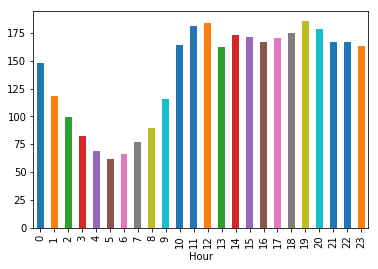

In [18]:
df_train.groupby('Hour')['Count'].mean().plot.bar()

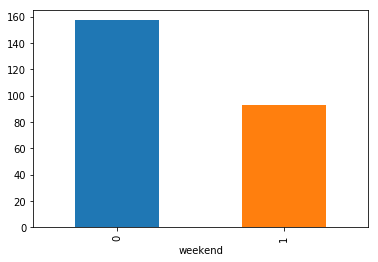

In [19]:
df_train.groupby('weekend')['Count'].mean().plot.bar()

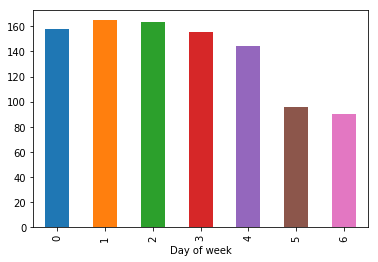

In [20]:
df_train.groupby('Day of week')['Count'].mean().plot.bar()

In [21]:
df_train= df_train.drop('ID',1) #dropping ID becoz it is of no use 

In [22]:
df_train.Timestamp = pd.to_datetime(df_train.Datetime,format='%d-%m-%Y %H:%M') 
df_train.index = df_train.Timestamp

# Hourly time series
hourly = df_train.resample('H').mean()

# Converting to daily mean
daily = df_train.resample('D').mean()

# Converting to weekly mean
weekly = df_train.resample('W').mean()

# Converting to monthly mean
monthly = df_train.resample('M').mean()

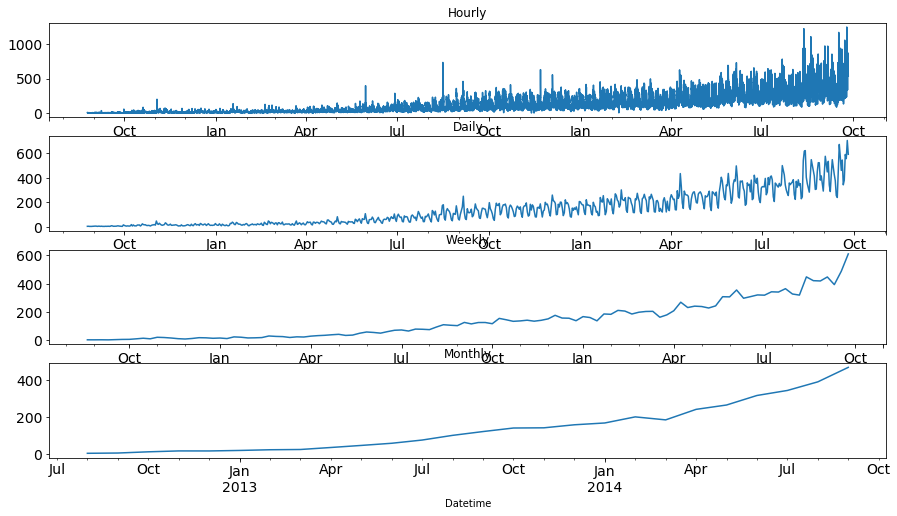

In [23]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [24]:
df_test.Timestamp = pd.to_datetime(df_test.Datetime,format='%d-%m-%Y %H:%M') 
df_test.index = df_test.Timestamp 

# Converting to daily mean
df_test = df_test.resample('D').mean()

df_train.Timestamp = pd.to_datetime(df_train.Datetime,format='%d-%m-%Y %H:%M') 
df_train.index = df_train.Timestamp

# Converting to daily mean
df_train = df_train.resample('D').mean()

# Splitting data into training and validating 

In [25]:
#x is training data , y is  validating data
X=df_train.ix['2012-08-25':'2014-06-24']
y=df_train.ix['2014-06-25':'2014-09-25']

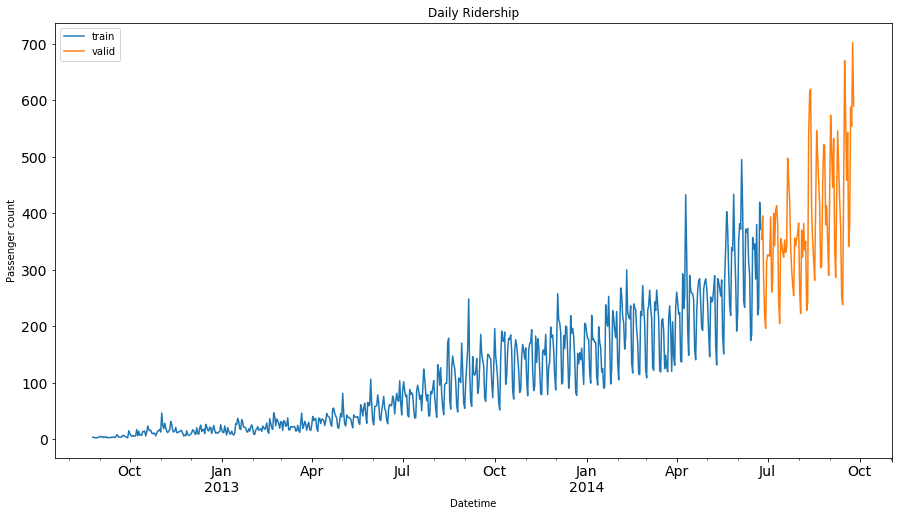

In [26]:
X.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
y.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

 # Modeling techniques
 
 i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model

In [27]:
# from sklearn.model_selection import train_test_split

# X, y = train_test_split(df_train, test_size=0.2)

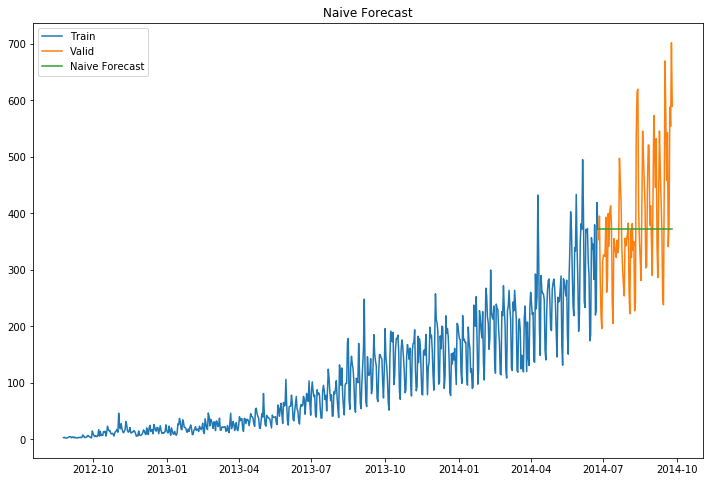

In [28]:
#i) Naive Approach

#x is training data , y is  validating data
dd= np.asarray(X.Count)
y_hat =y.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(X.index, X['Count'], label='Train')
plt.plot(y.index, y['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()





In [29]:
#calculate how accurate our predictions are using rmse(Root Mean Square Error)
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
rmse_1=sqrt(mse(y.Count,y_hat.naive))
print (rmse_1)

# ans =111.79050467496724
#hence discard this model due to high variablity

111.79050467496724


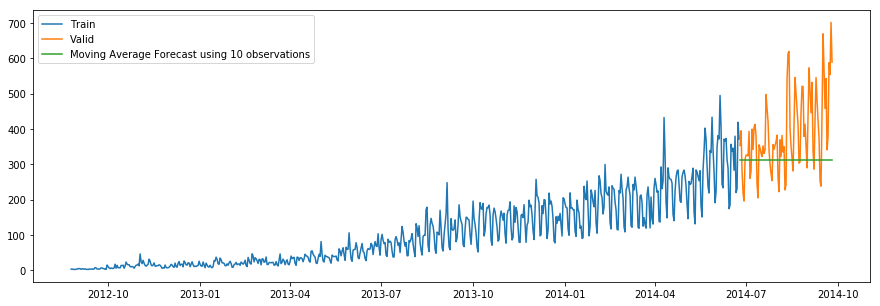

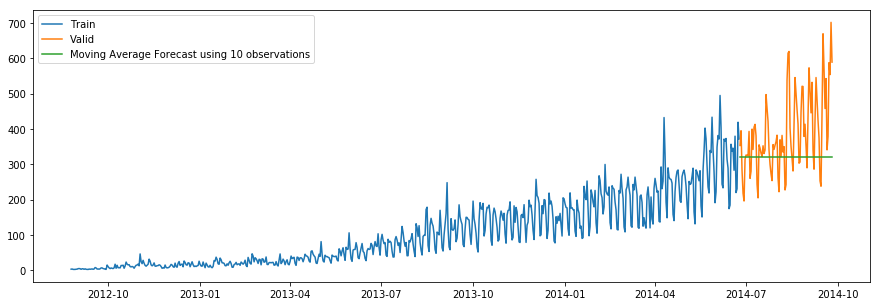

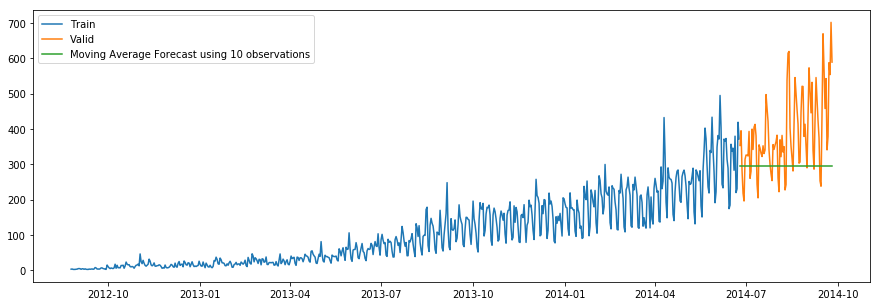

In [30]:
# 2.) MOving Average 


#Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

#for 10days
y_hat_avg = y.copy()
y_hat_avg['moving_avg_forecast'] = X['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.

plt.figure(figsize=(15,5)) 
plt.plot(X['Count'], label='Train')
plt.plot(y['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()


#for 10days
y_hat_avg = y.copy()
y_hat_avg['moving_avg_forecast'] = X['Count'].rolling(20).mean().iloc[-1] # average of last 10 observations.

plt.figure(figsize=(15,5)) 
plt.plot(X['Count'], label='Train')
plt.plot(y['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()


#for 10days
y_hat_avg = y.copy()
y_hat_avg['moving_avg_forecast'] = X['Count'].rolling(50).mean().iloc[-1] # average of last 10 observations.

plt.figure(figsize=(15,5)) 
plt.plot(X['Count'], label='Train')
plt.plot(y['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

In [31]:
#We can see that the predictions are getting weaker as we increase the number of observations.
rmse_2= sqrt(mse(y.Count, y_hat_avg.moving_avg_forecast)) #mse=mean_squared_error
print(rmse_2)


144.19175679986802


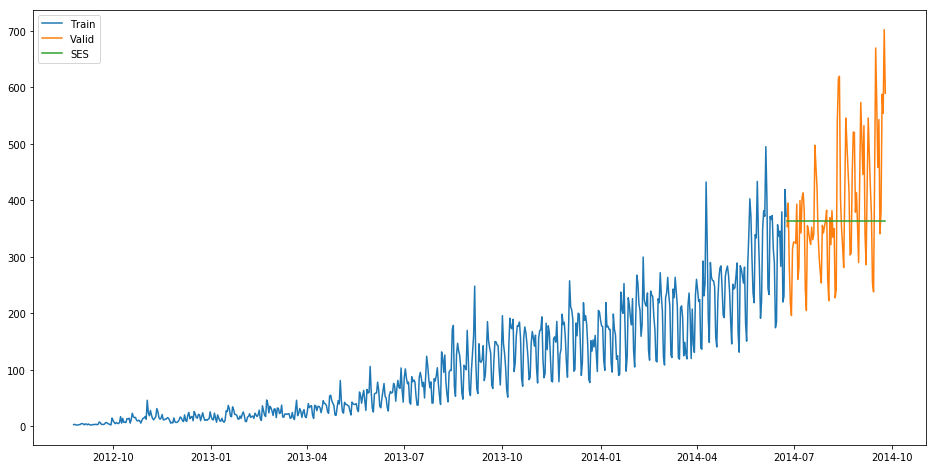

In [32]:
# ii) Simple Exponenetial Smoothing 

from statsmodels.tsa.api import  ExponentialSmoothing,SimpleExpSmoothing,Holt

y_hat_avg = y.copy()
fit2 = SimpleExpSmoothing(np.asarray(X['Count'])).fit(smoothing_level = 0.6,optimized = False)
y_hat_avg['SES'] = fit2.forecast(len(y))

plt.figure(figsize=(16,8))
plt.plot(X['Count'], label='Train')
plt.plot(y['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [33]:
rmse_3 = sqrt(mse(y.Count, y_hat_avg.SES))
print(rmse_3)

# rmse = 113.43708111884514
# the fit of the model has improved as the rmse value has reduced.      

113.43708111884514


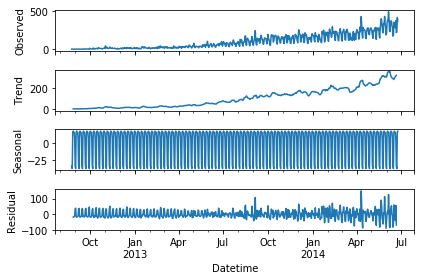

In [34]:
# 1v) 
#Holt’s Linear Trend Model

# >>> It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
# >>> This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

# First of all let us visualize the trend, seasonality and error in the series.

# We can decompose the time series in four parts.

# i)   Observed, which is the original time series.
# ii)  Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
# iii) Seasonal, which tells us about the seasonality in the time series.
# iv)  Residual, which is obtained by removing any trend or seasonality in the time series.

import statsmodels.api as sm 
sm.tsa.seasonal_decompose(X.Count).plot()
result = sm.tsa.stattools.adfuller(X.Count)
plt.show()



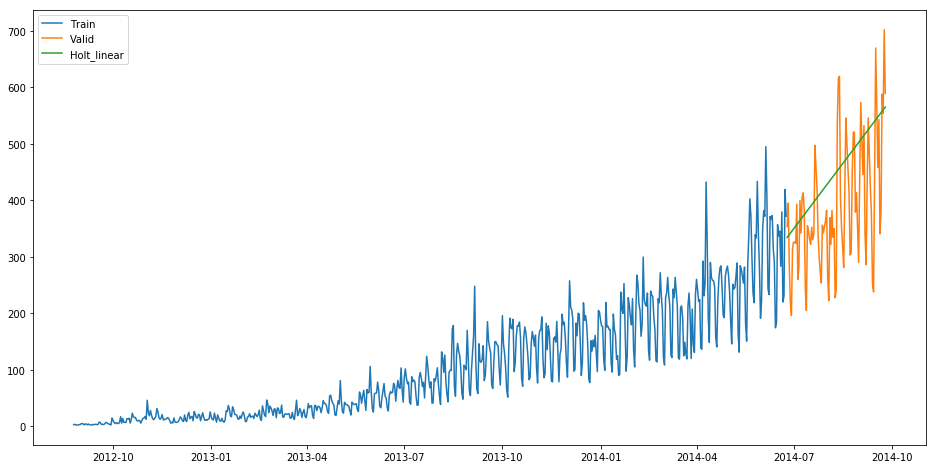

In [35]:
# An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

y_hat_avg = y.copy()

fit1 = Holt(np.asarray(X['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(y))

plt.figure(figsize=(16,8))
plt.plot(X['Count'], label='Train')
plt.plot(y['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()




In [36]:
rmse_4= sqrt(mse(y.Count,y_hat_avg.Holt_linear) )
rmse_4

#rmse = 112.94278345314041
# It can be inferred that the rmse value has decreased.


112.94278345314041

In [37]:

#Now we will be predicting the passenger count for the test dataset using various models.


#  Holt's Linear trend model on daily time series

In [38]:
import pandas as pd
submission = pd.read_csv("../data/submission.csv")

In [39]:
predict=fit1.forecast(len(y))

In [40]:
y_hat_avg ['prediction'] = predict

In [41]:
'''Remember this is the daily predictions. We have to convert these predictions to hourly basis. 
* To do so we will first calculate the ratio of passenger count for each hour of every day.
* Then we will find the average ratio of passenger count for every hour and we will get 24 ratios.
* Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.'''


# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(y_hat_avg , test_original, on=('Day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*temp2['ratio']*24
prediction['ID_y']=prediction['ID']

In [42]:
submission=prediction.drop(['ID', 'Day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

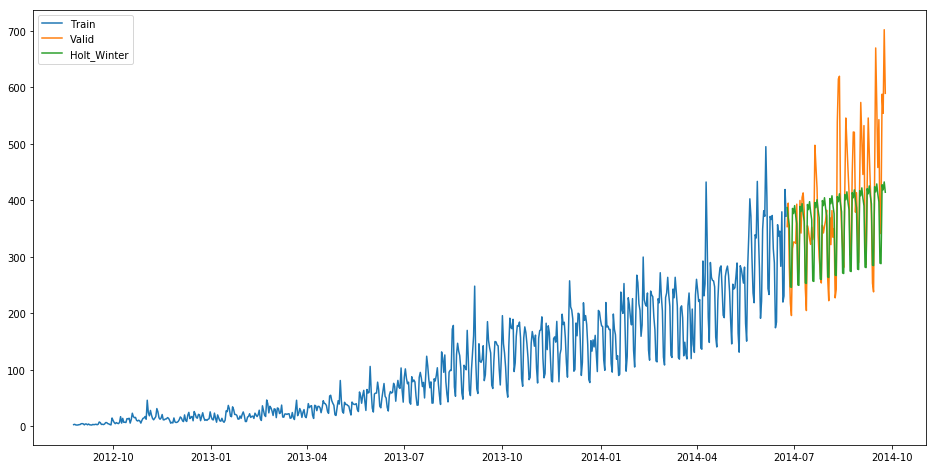

In [43]:
y_hat_avg = y.copy()
fit1 = ExponentialSmoothing(np.asarray(X['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(y))
plt.figure(figsize=(16,8))
plt.plot( X['Count'], label='Train')
plt.plot(y['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [44]:
rmse_holt =  sqrt(mse(y.Count, y_hat_avg.Holt_Winter))
rmse_holt

82.37467736825413

In [45]:
predict =  fit1.forecast(len(y))

In [46]:
y["prediction"] = predict  

In [47]:
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [48]:
# Merge Test and test_original on day, month and year
merge=pd.merge(y, test_original, on=('Day','Month', 'Year'), how='left')
merge['Hour']=merge['Hour_x']
merge=merge.drop(['Year', 'Month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*temp2['ratio']*24

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


In [49]:
prediction['ID']=prediction['ID']
submission=prediction.drop(['Day','Hour','ratio','prediction','ID'],axis=1)
#print(submission)
# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [50]:
'''Holt winters model produced rmse of 328.356 on the leaderboard.
The possible reason behind this may be that this model was not that good in predicting the trend of the time series but worked really well on the seasonality part.'''

'Holt winters model produced rmse of 328.356 on the leaderboard.\nThe possible reason behind this may be that this model was not that good in predicting the trend of the time series but worked really well on the seasonality part.'

In [51]:
'hence use arimamodel'

'hence use arimamodel'

 # Arimax model (Auto Regression Integrated Moving Average)

In [52]:
#parameter tuning for arima model

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(14).mean()
    # 24 hours on each day
    rolstd = timeseries.rolling(24).mean()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)




In [53]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

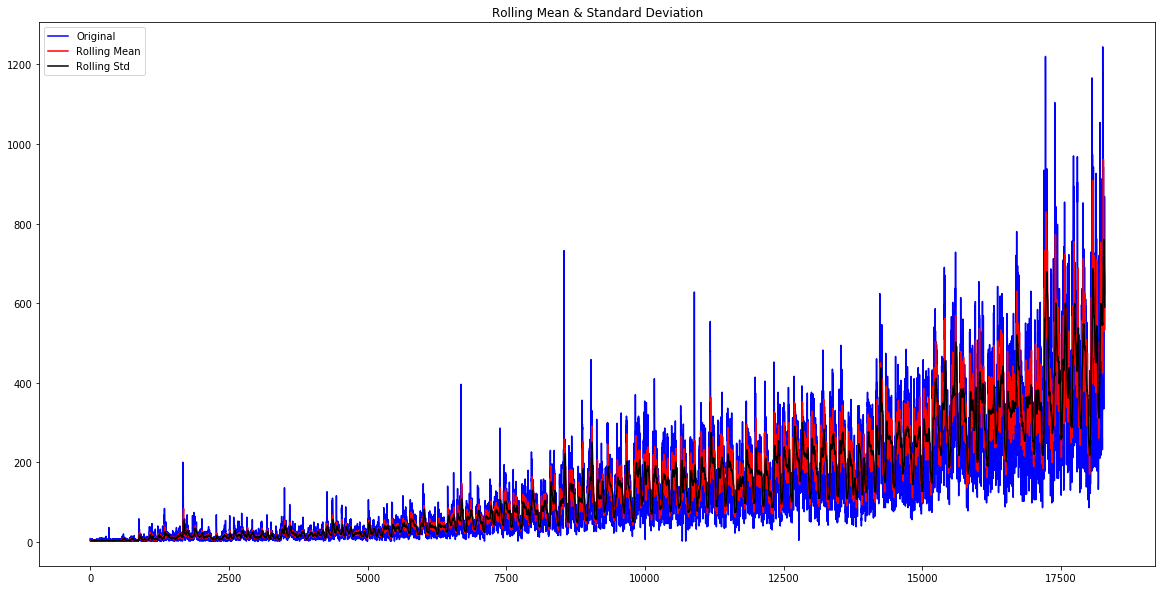

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [54]:
import pandas 
test_stationarity(train_original['Count'])


 # Removing Trend

In [55]:
#removing trend


Train_log = np.log(X['Count'])
valid_log = np.log(y['Count'])

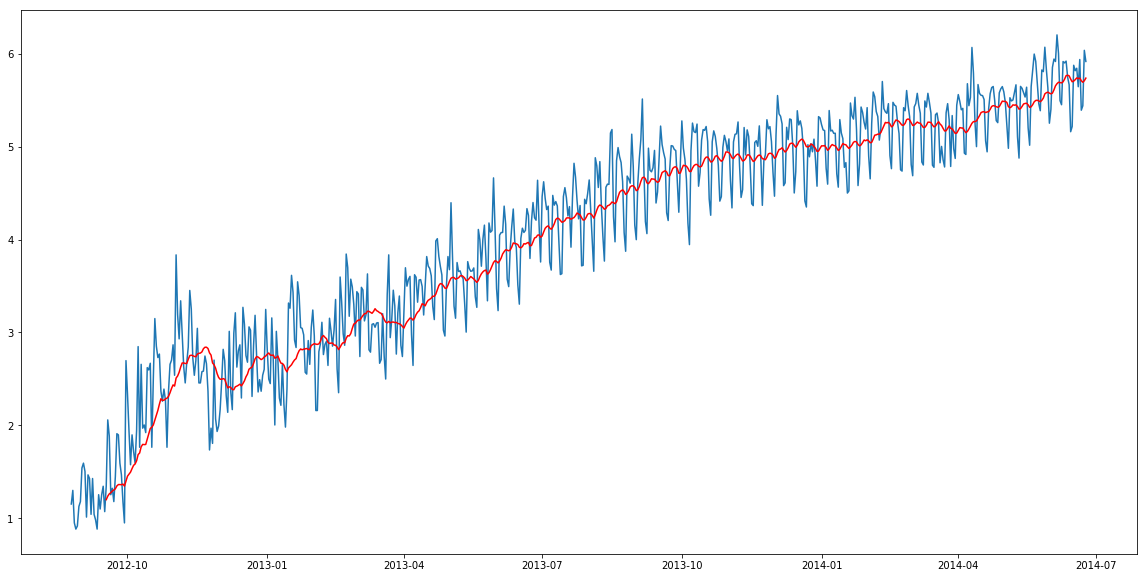

In [56]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [57]:
# remove this increasing trend to make the time series stationary.
train_log_moving_avg_diff = Train_log - moving_avg

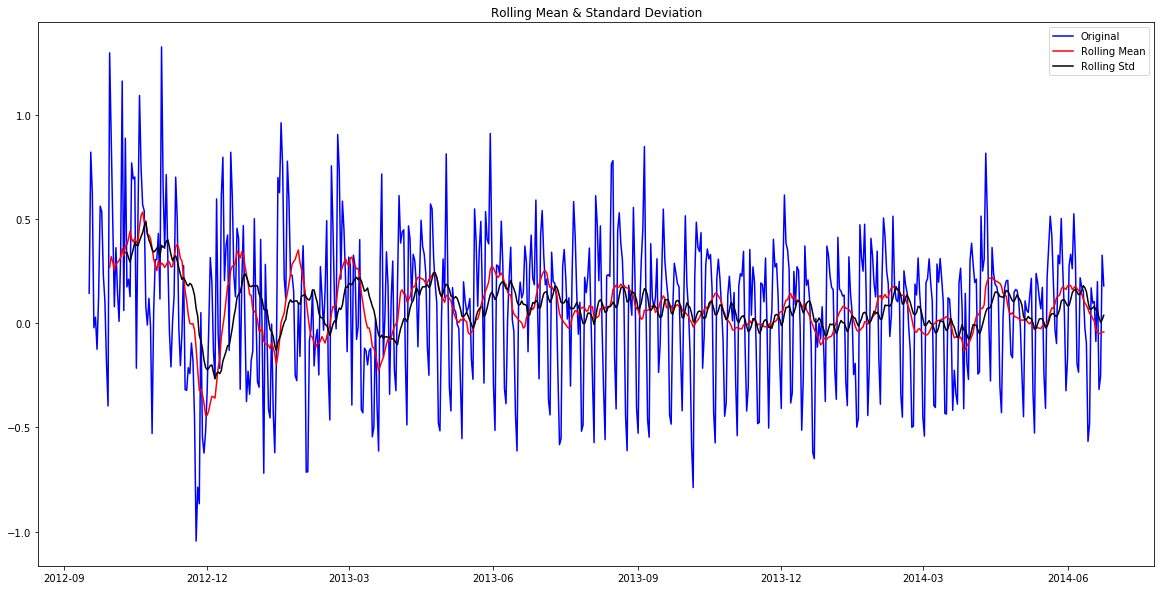

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [58]:
# the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)


#the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

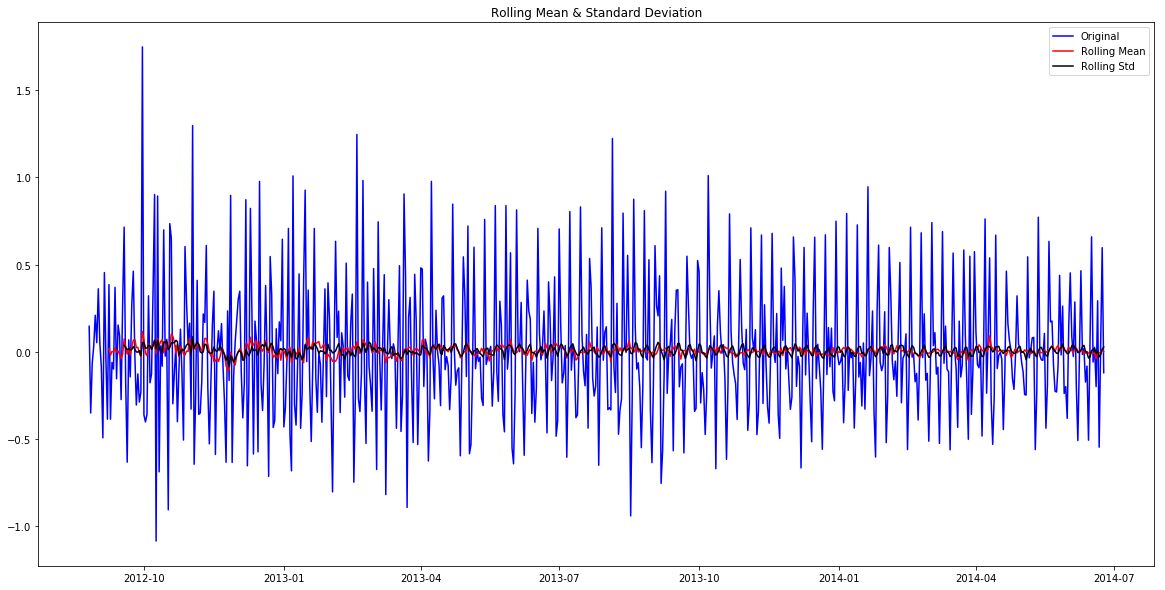

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [59]:
#Differencing can help to make the series stable and eliminate the trend.
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())


# Removing seasonality


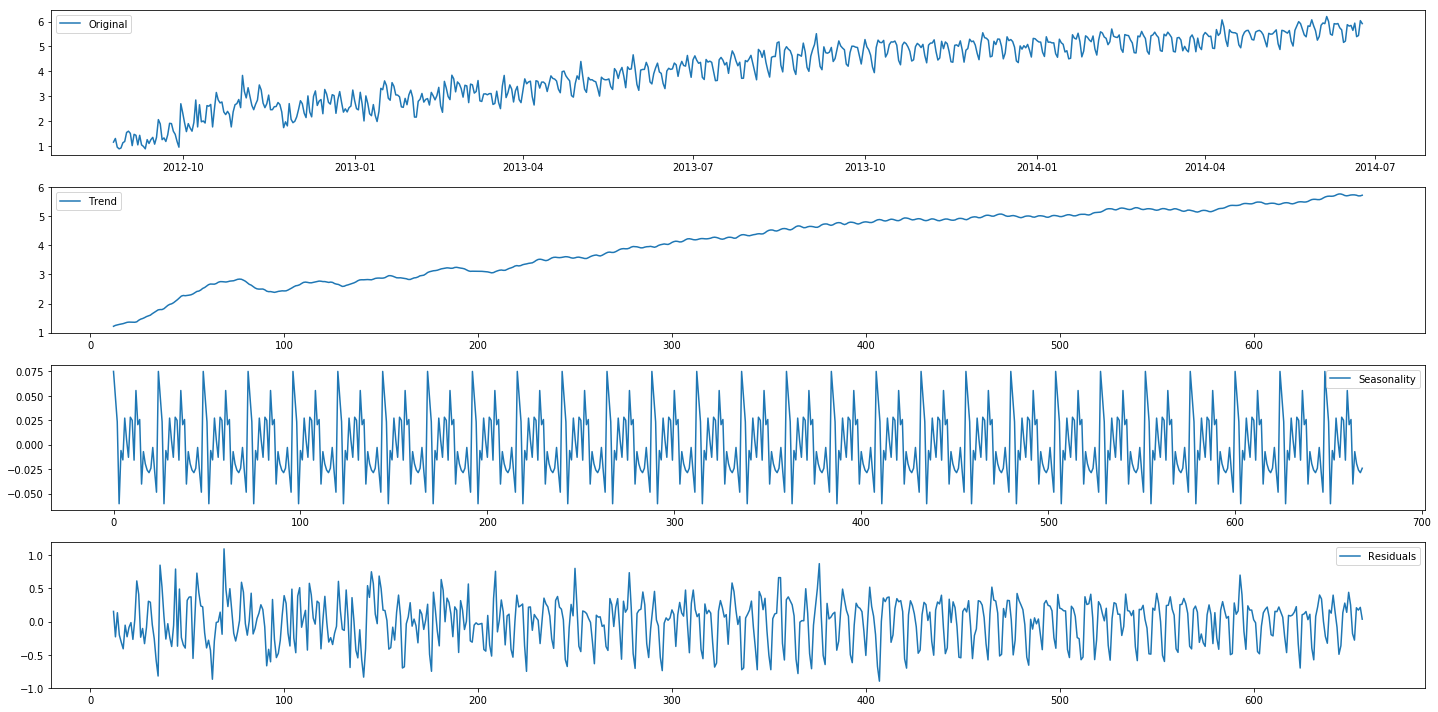

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

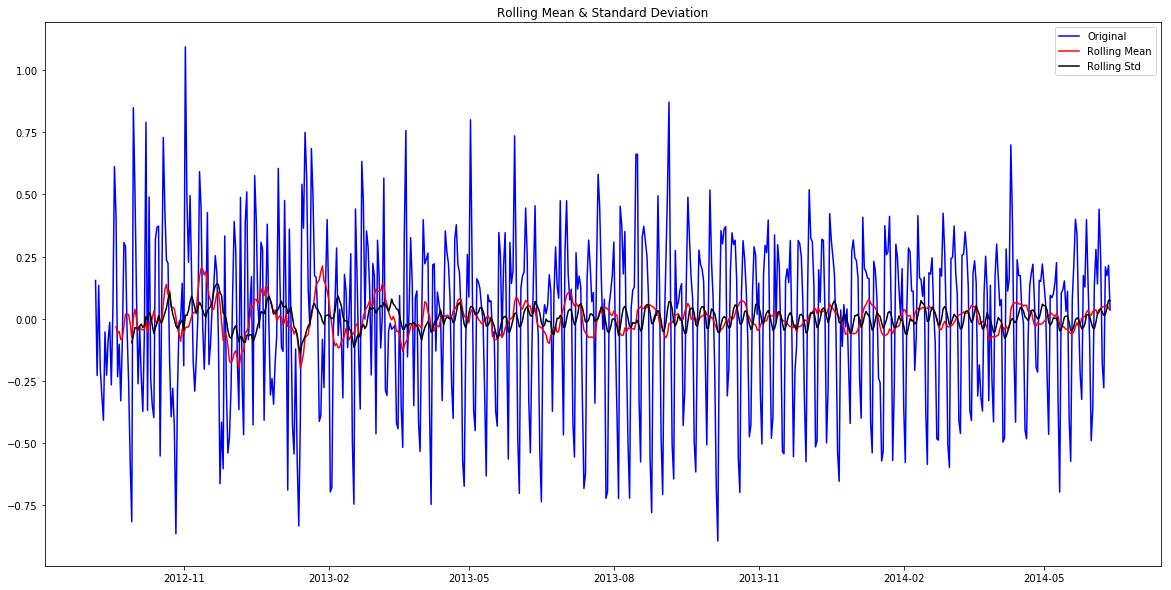

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [61]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])


In [62]:
# It can be interpreted from the results that the residuals are stationary.

# Now we will forecast the time series using different models.

  # Arima model

In [66]:
#findf optimized value of p,d,q
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(),nlags=25)
lag_pacf = pacf(train_log_diff.dropna(),nlags=25,method = 'ols' )

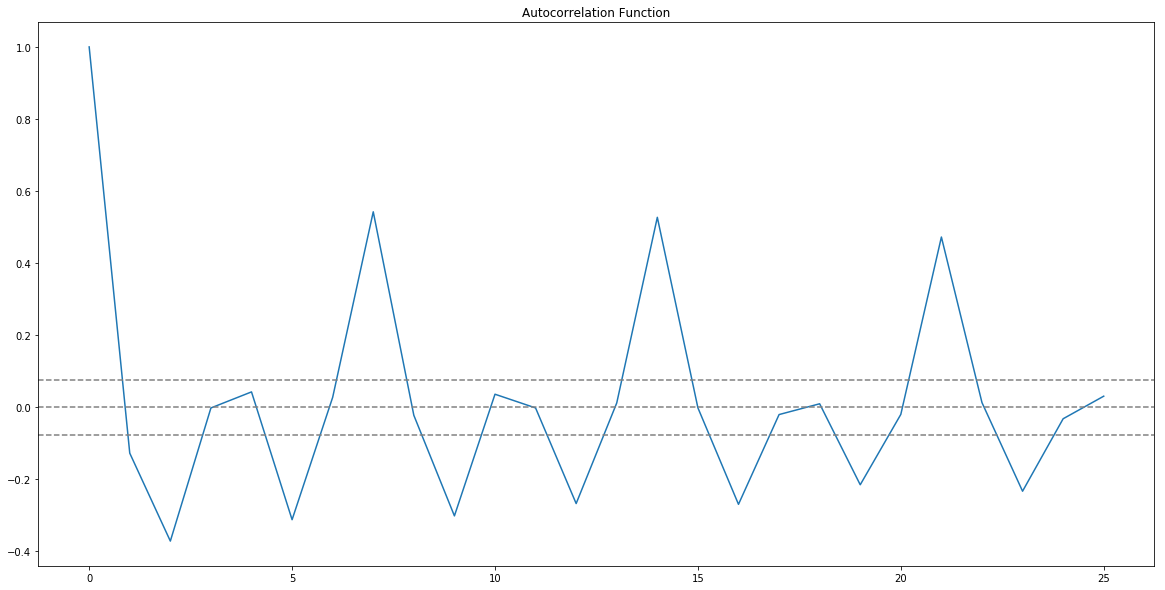

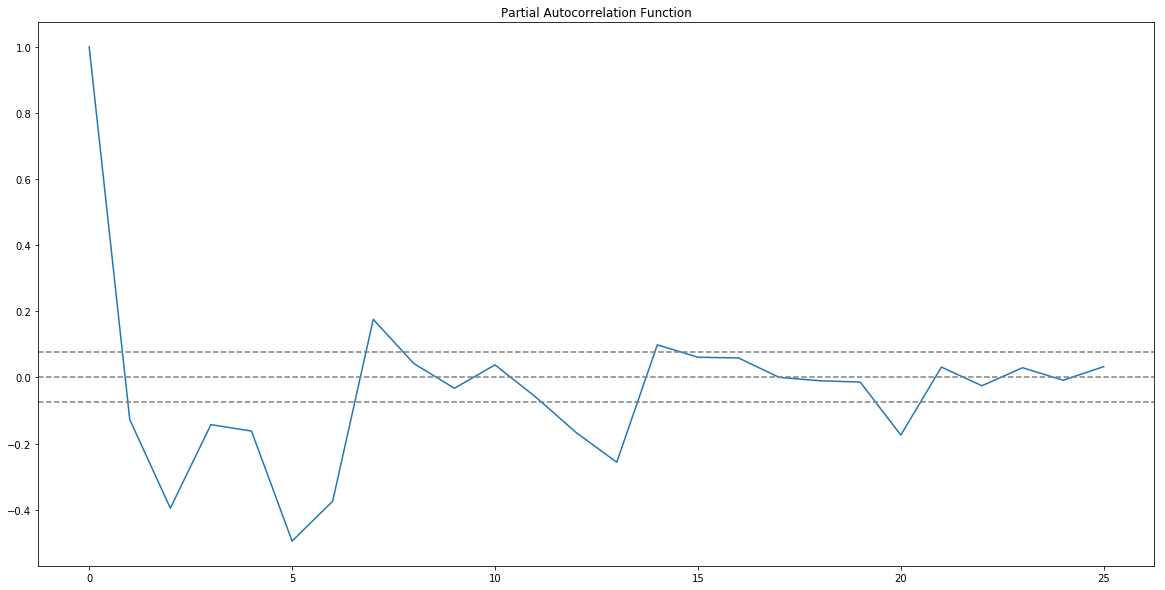

In [67]:
#plot acf and pacf
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [68]:
from statsmodels.tsa.arima_model import ARIMA

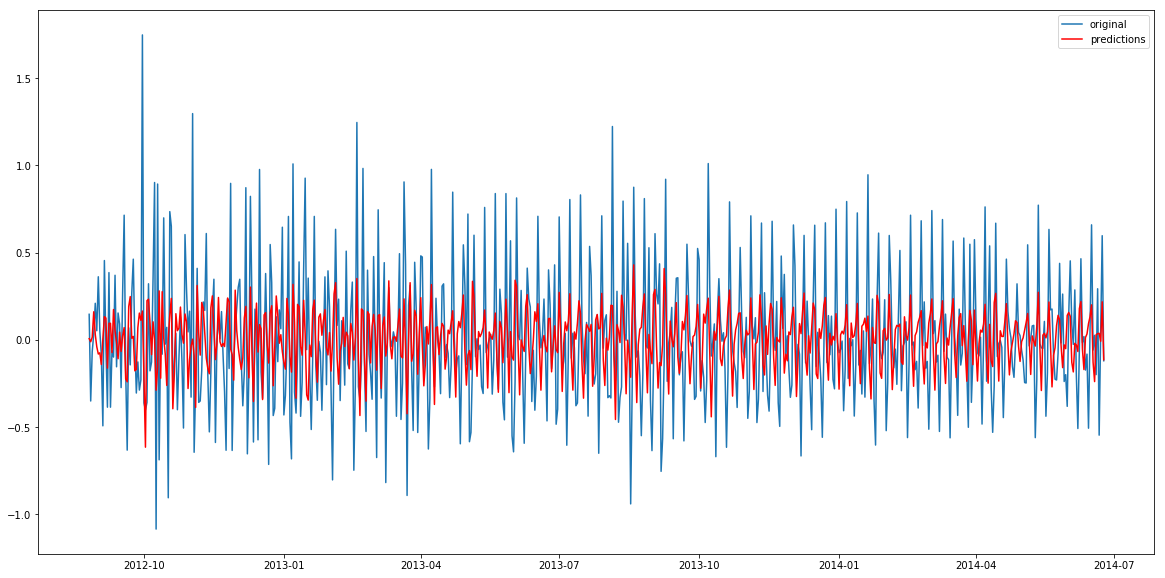

In [70]:
#AR model

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [71]:
#We have to change the scale of the model to the original scale.
#First step would be to store the predicted results as a separate series and observe it.


In [81]:
#y=valid
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(y.shape[0]) * np.log(y['Count'])[0], index = y.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

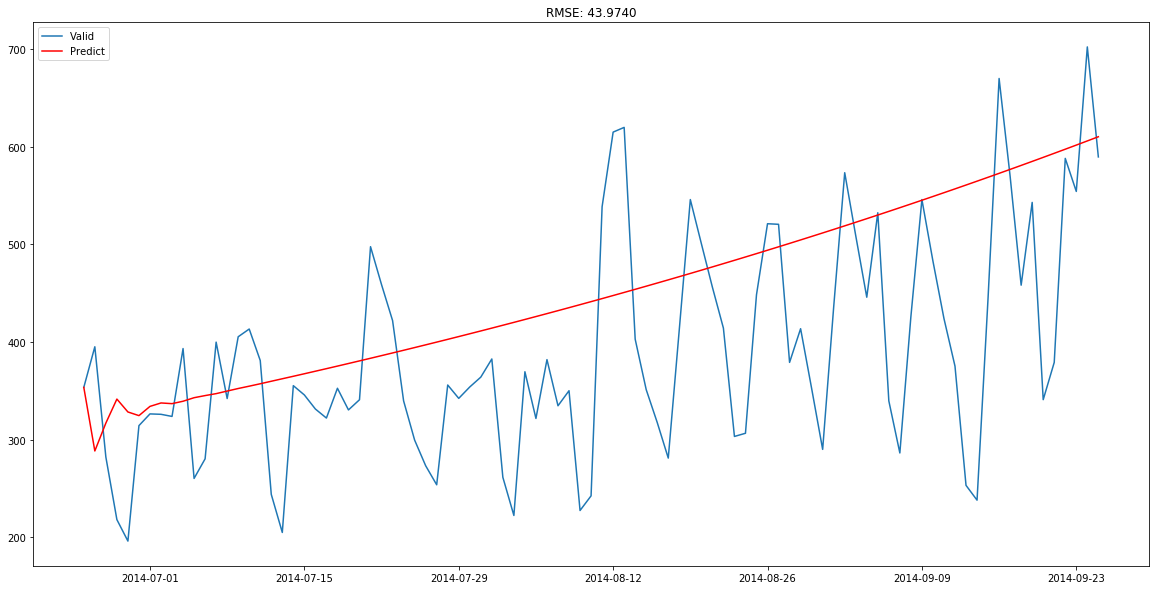

In [83]:
plt.plot(y['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, y['Count']))/y.shape[0]))
plt.show()
# red line shows the prediction for the validation set.

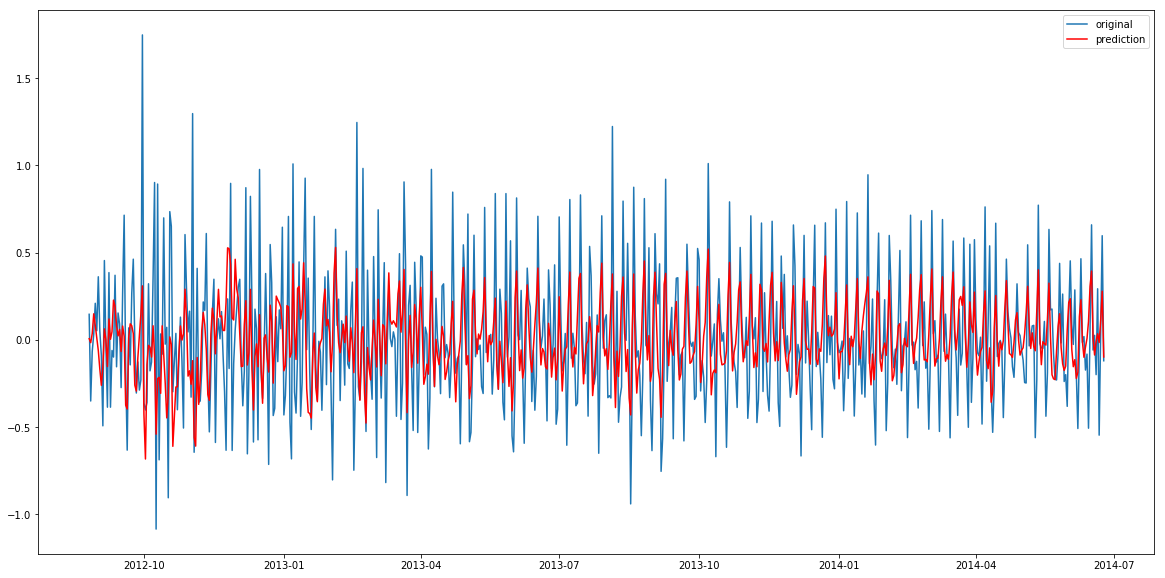

In [86]:
# RA model

model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [87]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(y.shape[0]) * np.log(y['Count'])[0], index = y.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

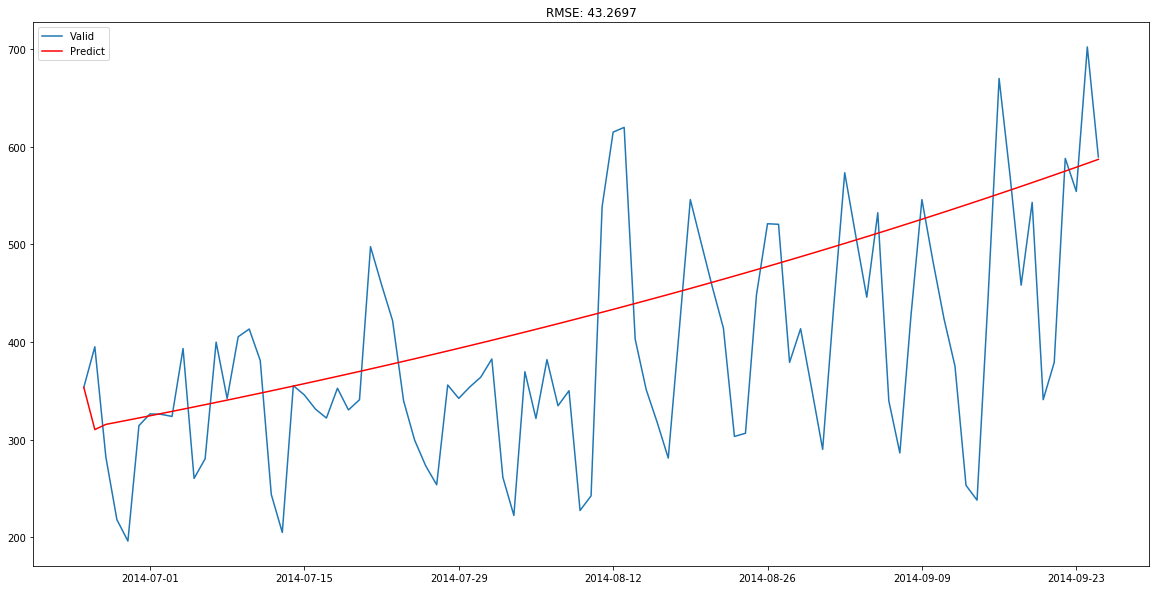

In [90]:
plt.plot(y['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, y['Count']))/y.shape[0]))
plt.show()


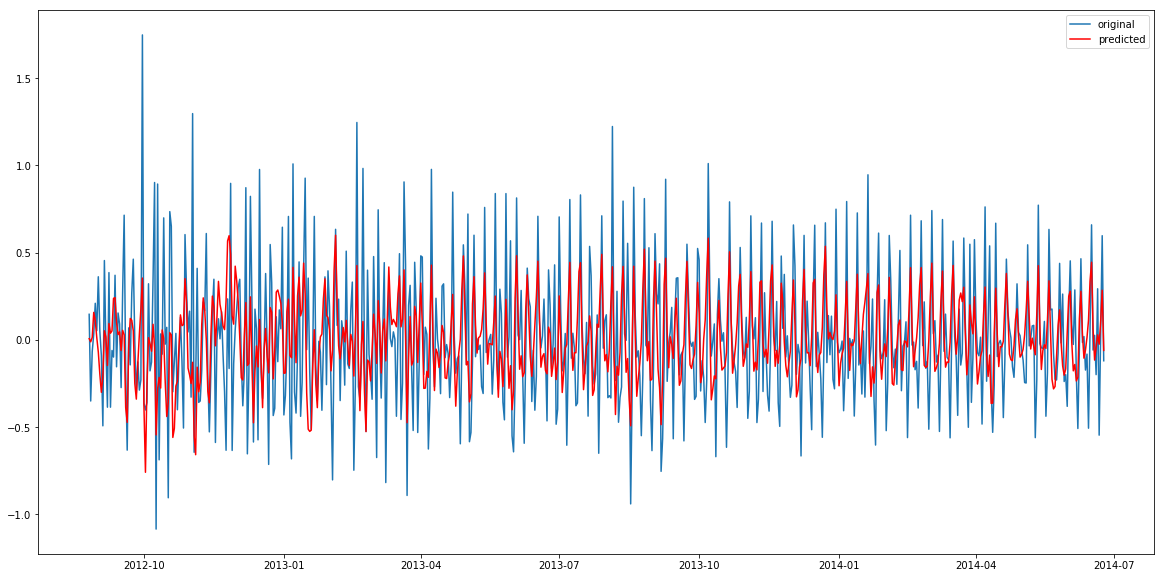

In [91]:
#combined model
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()


In [92]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [93]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [94]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

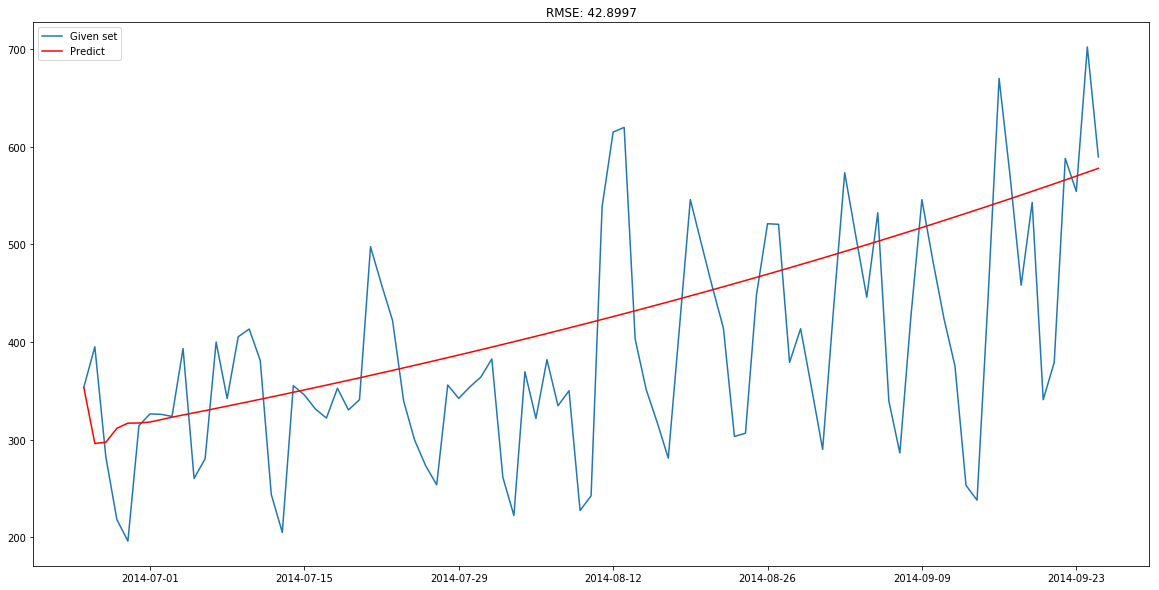

In [95]:
check_prediction_diff(ARIMA_predict_diff, y)    #y=valid
